(1991, 3)
                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


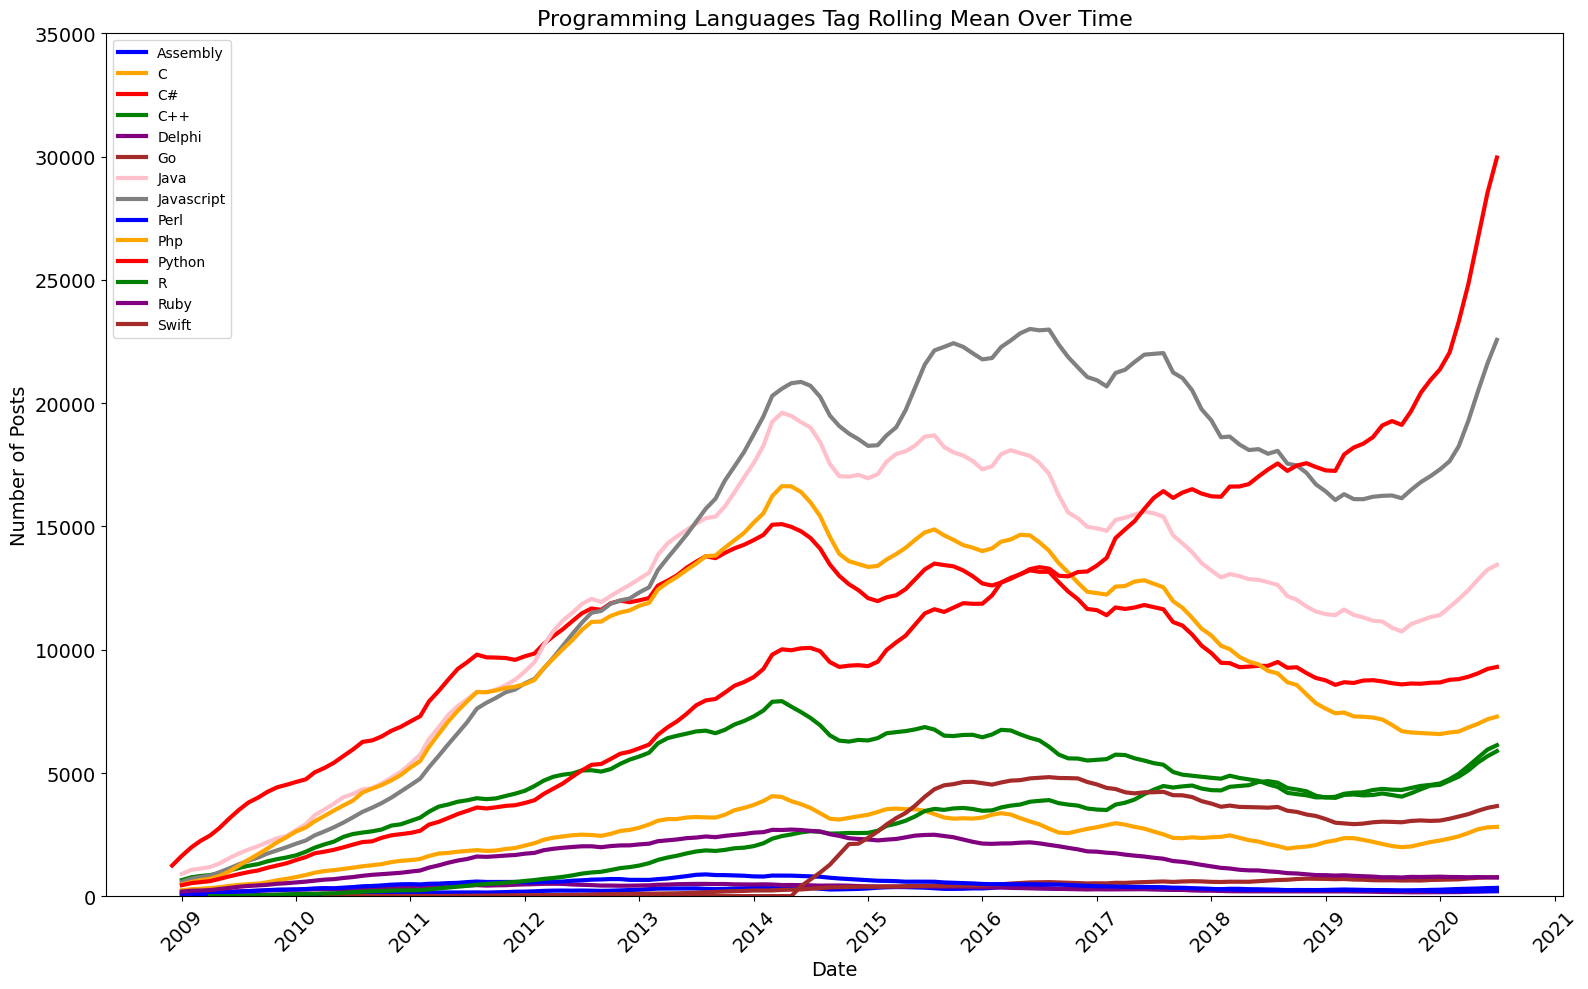

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Change the working directory
os.chdir('C:\\Users\\Siris\\Desktop\\GitHub Projects 100 Days NewB\\_24_0077__Day73_Data_Visualization_with_Matplotlib__240812\\NewProject\\r00-r09 START\\r00_env_START')

# Load the CSV file into a DataFrame
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

# Verify the changes
print(df.shape)
print(df.head())

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Pivot the DataFrame with monthly data
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

# Calculate the rolling mean with a window of 12 months (1 year)
rolling_mean_df = pivoted_df.rolling(window=6).mean()

# Define a list of standard primary and secondary colors
colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'pink', 'gray']

# Create the plot
plt.figure(figsize=(16, 10))

# Plot the rolling mean of each programming language tag with a linewidth of 3
for i, column in enumerate(rolling_mean_df.columns):
    color = colors[i % len(colors)]  # Cycle through the defined colors
    plt.plot(rolling_mean_df.index, rolling_mean_df[column], label=column.capitalize(), color=color, linewidth=3)

# Format the x-axis to show only years as labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set the x-axis ticks to show every 12 months (1 year)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Rotate x-axis labels for better readability and set fontsize
plt.xticks(rotation=45, fontsize=14)

# Set y-axis ticks fontsize
plt.yticks(fontsize=14)

# Set labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Set y-axis limits
plt.ylim(0, 35000)

# Add a title
plt.title('Programming Languages Tag Rolling Mean Over Time', fontsize=16)

# Add a legend
plt.legend()

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Assign the plot to PythonGraph2
PythonGraph2 = plt

# Display the plot
PythonGraph2.show()
